# Generate Simulated Data: Fixed-Plaintext-Dataset-1

In [86]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [87]:
# Define lengh for the data set
data_leng = 400000
numberOfSamples = 50

# Define key for encryption
key = 23

#Random Plaintext
FixedPlaintext = True

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = False

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -4
    jitterRight = 4
else:
    jitterLeft = None
    jitterRight = None

In [88]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [89]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,400000,50,23,0.0,5.0,None,None


In [90]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [91]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)

for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))

print("plaintext:",plaintext[0:5])

plaintext: [177, 177, 177, 177, 177]


In [92]:
# Verify size of plaintext
len(plaintext)

400000

In [93]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [3.1814221129750884, 0.05914570915085138, 4.789588526536645, -5.63032353491941, 3.0586068205024914] 
labels: [2, 2, 2, 2, 2]


In [94]:
# Verify size of leakedData 
len(leakedData)

400000

In [95]:
# Verify size of labels 
len(labels)

400000

In [96]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace at index 24 equal to t=25, index i matches with the leaked data
        if z == 24:
            rawData.append(leakedData[i])
        # Else create random sample
        else:
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart, noiseEnd))
            #rawData.append(0+gauss(noiseStart, noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  [8.330745956666494, 7.872282415772802, 7.604596104976585, 1.5331412392891846, 10.04768852601091, -1.3219087456521947, 1.939885816348009, 1.125423932817092, -3.6877704022452953, -0.5362027917307879, 5.026043009300888, 4.409593330578398, 9.516178331180383, 5.361175700374402, -0.40288026201755844, 10.240551772740488, 12.07182065952534, -1.1779958891363247, 3.3494979813736943, 4.051573753990795, 6.612236114319298, 6.850745213540968, 5.881616962804449, 3.480566433002621, 3.1814221129750884, 8.88053288932557, -2.033926069215445, 1.3107261248449382, 0.17339683584277932, 7.122029630274009, -6.165772887959594, -6.4354876632139, -5.548239353768348, 13.91089503101378, 13.555570853335611, 13.283902874895924, 10.741314134698982, -4.287273010877875, 7.495692576771551, 7.307538577608652, -3.726729579171711, 6.430058207982876, 10.338898315348754, 10.978792256054291, 7.2115176628093725, 10.088411961317078, 9.348044281985903, -0.074440397078817, 7.356326662931817, 3.803900761670

In [97]:
# Verify size of leakedData 
len(rawTraces)

400000

In [98]:
np.mean(rawTraces,axis= 0)

array([4.00667272, 3.9991139 , 3.99294382, 4.00767798, 4.00885035,
       4.01279853, 4.00208511, 3.99289091, 4.00029603, 4.00335268,
       4.00929631, 4.01124107, 3.98793777, 3.99242206, 3.98804857,
       4.00557659, 3.99487948, 3.99582829, 4.01612796, 3.99975871,
       4.01327462, 3.99718015, 3.98572341, 4.01095478, 1.98840913,
       4.00816452, 3.9902568 , 4.00404636, 3.99997926, 4.00364641,
       3.98486989, 4.004971  , 4.01446942, 3.99674069, 4.0075783 ,
       3.99007024, 4.00620283, 3.99475868, 4.01717852, 3.9900179 ,
       4.01321293, 4.01267512, 3.99578957, 4.01049339, 4.00156285,
       3.99982617, 4.0090102 , 4.00368809, 4.01222534, 4.01527593])

In [99]:
np.std(rawTraces,axis=0)

array([5.18952834, 5.18765662, 5.19040953, 5.19111083, 5.1930827 ,
       5.19679522, 5.19336641, 5.20892101, 5.19572791, 5.19786344,
       5.17815161, 5.19802412, 5.19647996, 5.1892981 , 5.19568634,
       5.19618455, 5.19860504, 5.19410738, 5.20029154, 5.20713408,
       5.19349508, 5.19764816, 5.19096395, 5.1985635 , 4.99643963,
       5.1977402 , 5.18877507, 5.1978151 , 5.20024991, 5.19564388,
       5.19410483, 5.19999123, 5.19413154, 5.19000084, 5.19365107,
       5.18969811, 5.1893869 , 5.19770562, 5.19737761, 5.20094027,
       5.18183135, 5.19385558, 5.19109893, 5.19072874, 5.19970013,
       5.19093258, 5.18667365, 5.20069421, 5.20769216, 5.18921468])

## Plot Simulated Data

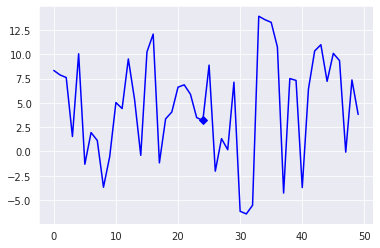

In [100]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[24])

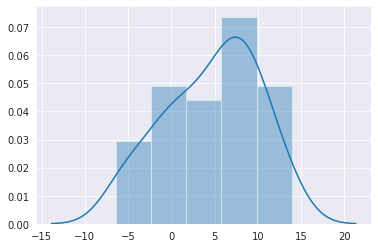

In [101]:
sns.distplot(rawTraces[0])

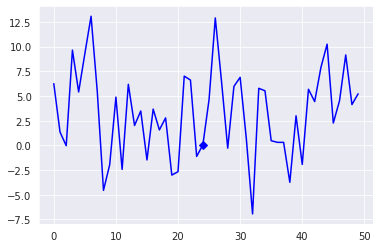

In [102]:
plt.plot(rawTraces[1],'-bD',markevery=[24])

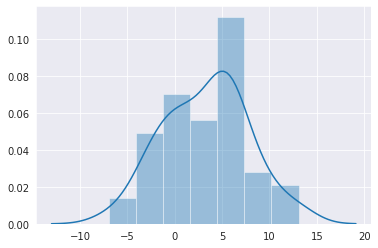

In [103]:
sns.distplot(rawTraces[1])

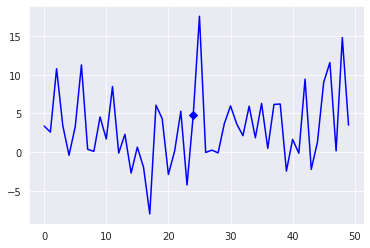

In [104]:
plt.plot(rawTraces[2],'-bD',markevery=[24])

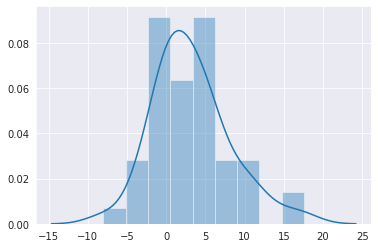

In [105]:
sns.distplot(rawTraces[2])

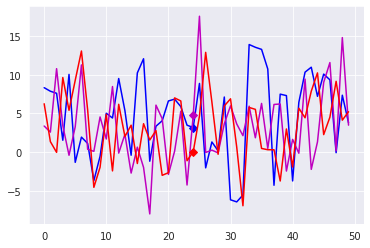

In [106]:
plt.plot(rawTraces[0],'-bD',rawTraces[2],'-mD',rawTraces[1],'-rD',markevery=[24])

### Data Path

In [107]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Test

In [108]:
class TestNotebook(unittest.TestCase):

    def test_Plaintext(self):
        self.assertEqual(plaintext[0], plaintext[1])
    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, True) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, False)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'FixedPlaintext')
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Plaintext (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.004s

OK


In [109]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,8.330746,7.872282,7.604596,1.533141,10.047689,-1.321909,1.939886,1.125424,-3.687770,-0.536203,...,6.430058,10.338898,10.978792,7.211518,10.088412,9.348044,-0.074440,7.356327,3.803901,177
1,6.252584,1.356645,-0.031854,9.644140,5.407356,9.287437,13.072234,5.456576,-4.553994,-1.952695,...,5.678808,4.437927,7.873724,10.244357,2.263795,4.517303,9.155007,4.131319,5.225327,177
2,3.370700,2.590089,10.789659,3.420999,-0.407243,3.278137,11.275026,0.366718,0.097605,4.546633,...,-0.144535,9.440087,-2.229628,1.320293,9.019555,11.578699,0.164597,14.808600,3.488495,177
3,-4.403382,10.760413,9.033596,4.232243,0.502533,8.665134,-6.075462,3.517697,11.978666,0.144026,...,11.384974,6.719498,2.471749,7.836956,-6.349471,9.828042,-3.596991,7.775418,3.712222,177
4,3.225792,1.650304,-0.036317,6.851310,8.429175,6.558461,7.216114,6.127367,2.353863,10.011330,...,2.637116,2.060384,10.447199,3.356592,4.134025,6.332870,9.669175,-6.206107,7.516747,177


### Write Data

In [110]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS1_A.csv',index=False)